<a href="https://colab.research.google.com/github/gomes-lab/course-cs2770-2023sp/blob/main/Notebooks/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering
## Image segmentation
Image segmentation is an essential step in image processing because a picture often contains multiple objects, and we need to separate these objects properly before analyzing them individually. For instance, images used by self-driving cars may contain roads, pedestrians, cars, and traffic signs, and these elements need to be separated and identified correctly.  

In this section, we will use the K-Means Clustering algorithm to segment images based on the colors of each pixel. First, we need to import the necessary packages.

In [ ]:
"""
Task: Run the cell to import all the required packages.
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import urllib
from skimage import io

(853, 1280, 3)


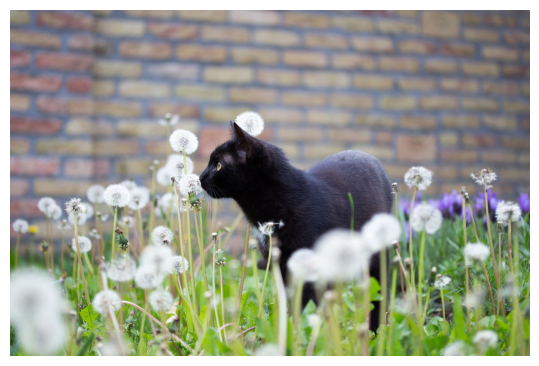

In [ ]:
"""
Task: Run this cell 
"""
# read the image
url='https://github.com/gomes-lab/course-cs2770-2021sp/blob/main/cat.jpg?raw=true'
image=io.imread(url)
#print the shape of image, image should be a 853 by 1280 by 3 array.
print(image.shape)
# show the original image
plt.figure(figsize=(8,4.5)) 
plt.axis('off')
plt.imshow(image)
plt.show()

We need to pre-process the image array before it can be used as the input to the K-Means Algorithm. The input to the K-Means algorithm in OpenCV should be a 2D np.float32 array where each feature is put in a single column. Here, the features are the R, G, and B values of each pixel. Thus, we reshape the image array into a 2D array where each row corresponds to a pixel, and the three columns correspond to the R, G, and B values, respectively, i.e., each row of the 2D array shows the RGB values of the corresponding pixel. Then we convert the datatype of the 2D array into np.float32.

In [ ]:
"""
Task: Run this cell
"""
#reshape the image array into a 2D array where each row is the RGB value of a pixel 
pixel_colors=image.reshape((-1,3))
print(pixel_colors.shape)
#change the datatype of the 2D array
pixel_colors = np.float32(pixel_colors)

(1091840, 3)


Now we can run the K-Means Clustering algorithm on the 2D array. We need to specify the number of cluster $K$ we want before running the algorithm. The outputs of the kmeans algorithm are:
- compactness : the sum of squared distance from each point to their corresponding centers.
- labels : A column array showing which cluster each pixel belongs to.
- centers : An array of the centroids of each clusters. Here they represent the average colors of each cluster of pixels. 

Finally, we need to reconstruct the segmented image by converting the color of all pixels to the color of the centroids.

**Question:** Experiment with different values of K. At least how many clusters do we need to properly separate the cat from the surroundings?  At least how many clusters do we need to properly identify the green grass in the image? **Include the corresponding segmented images** in your write up.

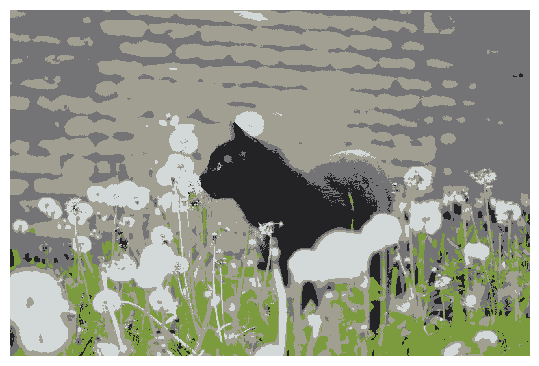

In [ ]:
"""
Task: Experiment with this cell by changing value of K. How many clusters do we need to 
properly separate the cat from the background?  
"""
K = 5 # The number of clusters. K should be a integer larger than 1.

# Set the stopping criteria of the algorithm. The line below means
# stopping the algorithm when specified accuracy 0.1 is reached
# or when the number of iterations reaches 200.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#run the kmeans algoritm
compactness,labels,centers = cv2.kmeans(pixel_colors, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


# change the datatype of the centers back to uint8 so that they can be read as RGB colors
centers = np.uint8(centers)

# all pixels in the same cluster with take on the color of the center of the cluster.
segmented_data = centers[labels.flatten()]

# reshape the array back to the shape of the image
segmented_image = segmented_data.reshape(image.shape)

# show the segmented image
plt.figure(figsize=(8,4.5)) 
plt.axis('off')
plt.imshow(segmented_image,interpolation='nearest')
plt.show()

# Clustering Climate Data
For this exercise, first read the introduction section of the paper [Parallel k-Means Clustering for Quantitative Ecoregion Delineation
Using Large Data Sets](https://www.srs.fs.usda.gov/pubs/ja/2011/ja_2011_kumar_001.pdf) and then answer the questions below.

**Question:** What is an ecoregion? What is one way ecoregions are used by ecologists?

**Question:** How have ecoregions been defined in the past? What is one are potential issues with this method?

**Question:** How could using a clustering algorithm like k-means improve over the earlier method?

### Classifying the Global Environment
We will now attempt a similar clustering technique on global climate data. The dataset 'global_climate_data.npy' contains normalized average terrestrial temperature and precipitaion data around the globe from 1991 to 2000. The dataset divides the world map into a 360 by 720 grid and contains the 12 monthly mean air temperature and the 12 monthly mean precipitation for each grid cell. For instance, the data on mean air temperature in July is stored in <code>clim_data[:,:,6]</code>, and the data on mean precipitation in March is stored in <code>clim_data[:,:,14]</code>. 

Run the cell below to load the dataset and print a map of mean air temperature in July.

**Note:** The numbers in the array are normalized and are not the original data. To undo normalization, for temperature data scale by 0.54 and subtract 85.0, and for precipitation data scale by 6.4. Also, the dataset only contains climate data for terrestrial cells. All features for ocean cell are set to 254.
The data is downloaded from IPCC Data Distribution Centre.

(360, 720, 24)


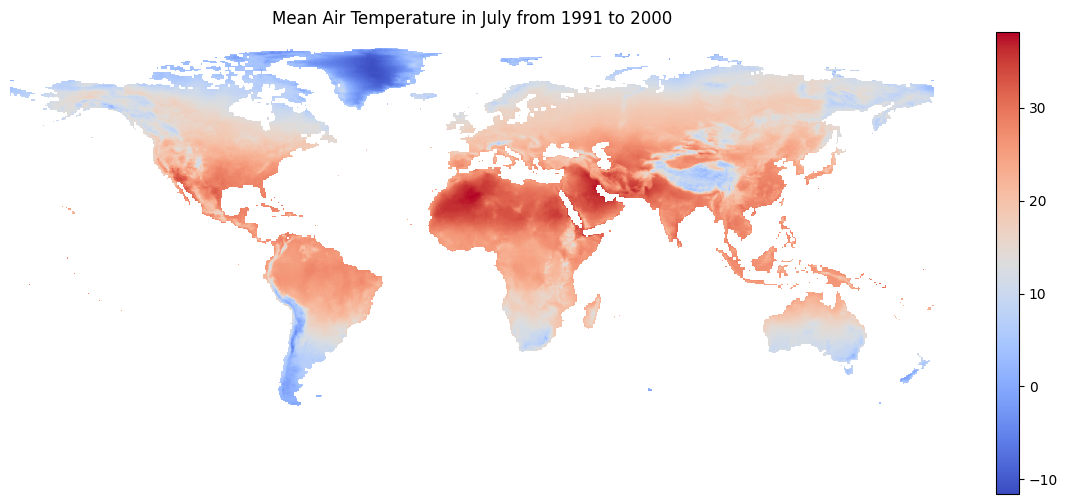

In [ ]:
"""
Task: Run this cell
"""
r = requests.get('https://github.com/gomes-lab/course-cs2770-2023sp/blob/main/Data/global_climate_data.npy?raw=true', stream = True)
clim_data = np.load(BytesIO(r.raw.read()))
# clim_data is a 360 by 720 by 24 array, representing 360 x 720 spatial pixels with 24 enviromental features
print(clim_data.shape)
# The normalized mean temperature data in July is stored in clim_data[:,:,6]
july_temp=clim_data[:,:,6]
july_temp = np.where(july_temp > 253, np.nan, july_temp) #remove data from ocean areas
july_temp= july_temp*0.54 - 85.0 # undo the normalization

# Plot the mean air temperature in July 
fig = plt.figure(figsize=(16,6))
plt.imshow(july_temp, cmap=plt.cm.coolwarm)  
plt.axis('off')
plt.title('Mean Air Temperature in July from 1991 to 2000')
plt.colorbar()
plt.show()

Next, we run the K-Means Clustering algorithm to classify the global environment into $K$ types. This time, we only need to know the cluster assignment (label) of the cells.

**Question:** What is input data for the clustering in the Python notebook? How many spatial areas do we consider? How many features do we have for each area?

**Question:** Running the code in the notebook with 5 clusters, do the clusters seem to include areas you'd expect to have a similar environment? Try to give a name or briefly describe each cluster and include the image produced by the notebook.

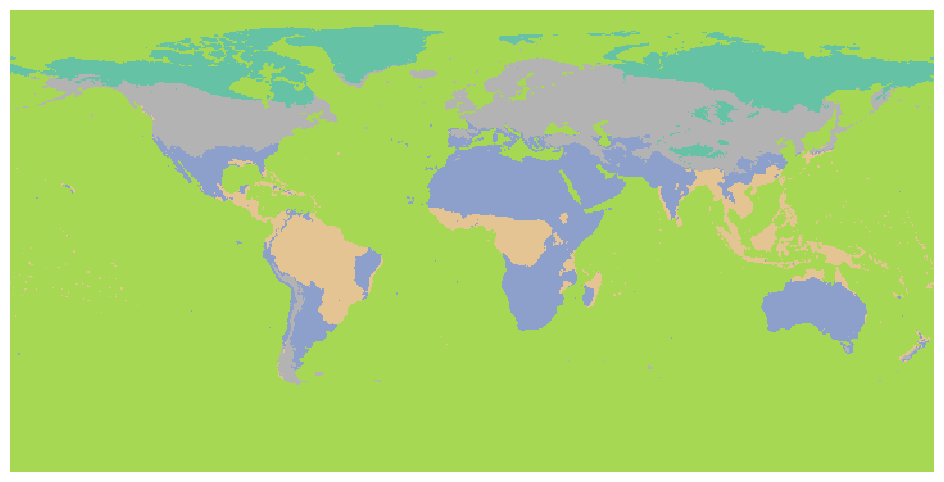

In [ ]:
"""
Task: Run this cell
"""
K = 5 # The number of clusters. K should be a integer larger than 1.

#reshape the data array into a 2D array 
clim_data_reshape=clim_data.reshape((-1,24))
#change the datatype of the 2D array
clim_data_reshape = np.float32(clim_data_reshape)

# Set the stopping criteria of the algorithm. The line below means
# stopping the algorithm when specified accuracy 0.2 is reached
# or when the number of iterations reaches 200.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#run the kmeans algoritm
compactness,labels,centers = cv2.kmeans(clim_data_reshape, K, None, criteria, 20, cv2.KMEANS_RANDOM_CENTERS)

# all pixels in the same cluster with take on the color of the center of the cluster.
labels= labels.flatten()
# reshape the array back to the shape of the image
segmented_map = labels.reshape((360,720))
# show the segmented map
plt.figure(figsize=(16,6)) 
plt.axis('off')
plt.imshow(segmented_map,interpolation='nearest', cmap=plt.cm.Set2)
plt.show()